In [2]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from fedlern.models.mlp import MLP
from fedlern.models.resnet_v2 import ResNet18
from fedlern.train_utils import *
from fedlern.quant_utils import *
import fedlern.utils as utils
import torch.nn.functional as F

In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
cuda_device = torch.device("cuda:0")
cpu_device = torch.device("cpu:0")

#stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
stats = (0.49139968, 0.48215841, 0.44653091), (0.24703223, 0.24348513, 0.26158784)
batch_size = 1000

In [4]:
train_loader, test_loader = prepare_dataloader_cifar(num_workers=8, train_batch_size=batch_size ,eval_batch_size=batch_size, stats=stats)


Files already downloaded and verified


# RESNET no quantization

In [26]:
# Test the model

model = ResNet18()
load_model(model, '../saved_models/resnet18_cifar10_92-5.pt', device)

loss, acc = evaluate_model(model, test_loader, device,)
print(f'Loss: {loss}, Accuracy: {acc*100}%')
print_model_size(model)


fp32_cpu_inference_latency = measure_inference_latency(model=model, device=cpu_device, input_size=(1,3,32,32), num_samples=100)
fp32_gpu_inference_latency = measure_inference_latency(model=model, device=cuda_device, input_size=(1,3,32,32), num_samples=100)
print("FP32 CPU Inference Latency: {:.2f} ms / sample".format(fp32_cpu_inference_latency * 1000))
print("FP32 CUDA Inference Latency: {:.2f} ms / sample".format(fp32_gpu_inference_latency * 1000))




Loss: 0.0, Accuracy: 92.49999237060547%
44.77 MB
FP32 CPU Inference Latency: 11.95 ms / sample
FP32 CUDA Inference Latency: 5.32 ms / sample


In [27]:
# Load the model
model = ResNet18()
load_model(model, '../saved_models/resnet18_cifar10_92-2.pt', device)

# Test the model
loss, acc = evaluate_model(model, test_loader, device,)
print(f'Loss: {loss}, Accuracy: {acc*100}%')
print_model_size(model)

# Measure inference latency
fp32_cpu_inference_latency = measure_inference_latency(model=model, device=cpu_device, input_size=(1,3,32,32), num_samples=100)
fp32_gpu_inference_latency = measure_inference_latency(model=model, device=cuda_device, input_size=(1,3,32,32), num_samples=100)
print("FP32 CPU Inference Latency: {:.2f} ms / sample".format(fp32_cpu_inference_latency * 1000))
print("FP32 CUDA Inference Latency: {:.2f} ms / sample".format(fp32_gpu_inference_latency * 1000))


Loss: 0.0, Accuracy: 92.24999237060547%
44.77 MB
FP32 CPU Inference Latency: 7.22 ms / sample
FP32 CUDA Inference Latency: 5.40 ms / sample


In [8]:
# Load the model
model = ResNet18()
load_model(model, '../saved_models/resnet_fedlern_dyn851bits_2023-08-25_15-32.pth', device)

# Test the model
loss, acc = evaluate_model(model, test_loader, device,)
print(f'Loss: {loss}, Accuracy: {acc*100}%')
print_model_size(model)

# Measure inference latency
fp32_cpu_inference_latency = measure_inference_latency(model=model, device=cpu_device, input_size=(1,3,32,32), num_samples=100)
fp32_gpu_inference_latency = measure_inference_latency(model=model, device=cuda_device, input_size=(1,3,32,32), num_samples=100)
print("CPU Inference Latency: {:.2f} ms / sample".format(fp32_cpu_inference_latency * 1000))
print("CUDA Inference Latency: {:.2f} ms / sample".format(fp32_gpu_inference_latency * 1000))


Loss: 0.0, Accuracy: 81.02999877929688%
44.77 MB
CPU Inference Latency: 9.04 ms / sample
CUDA Inference Latency: 2.93 ms / sample


# RESNET Quantization 4 bits

In [29]:
# Load the model
model = ResNet18()
load_model(model, '../saved_models/resnet_4bits_2023-06-29_22-17.pth', device)

# Test the model
loss, acc = evaluate_model(model, test_loader, device,)
print(f'Loss: {loss}, Accuracy: {acc*100}%')
print_model_size(model)

# Measure inference latency
cpu_inference_latency = measure_inference_latency(model=model, device=cpu_device, input_size=(1,3,32,32), num_samples=100)
gpu_inference_latency = measure_inference_latency(model=model, device=cuda_device, input_size=(1,3,32,32), num_samples=100)
print("CPU Inference Latency: {:.2f} ms / sample".format(cpu_inference_latency * 1000))
print("CUDA Inference Latency: {:.2f} ms / sample".format(gpu_inference_latency * 1000))

Loss: 0.0, Accuracy: 83.5199966430664%
44.77 MB
CPU Inference Latency: 7.00 ms / sample
CUDA Inference Latency: 5.32 ms / sample


# Quantization 8 bits

In [30]:
# Load the model
model = ResNet18()
load_model(model, '../saved_models/resnet_8bits_2023-06-30_05-04.pth', device)

# Test the model
loss, acc = evaluate_model(model, test_loader, device,)
print(f'Loss: {loss}, Accuracy: {acc*100}%')
print_model_size(model)

# Measure inference latency
cpu_inference_latency = measure_inference_latency(model=model, device=cpu_device, input_size=(1,3,32,32), num_samples=100)
gpu_inference_latency = measure_inference_latency(model=model, device=cuda_device, input_size=(1,3,32,32), num_samples=100)
print("CPU Inference Latency: {:.2f} ms / sample".format(cpu_inference_latency * 1000))
print("CUDA Inference Latency: {:.2f} ms / sample".format(gpu_inference_latency * 1000))

Loss: 0.0, Accuracy: 81.16999816894531%
44.77 MB
CPU Inference Latency: 7.01 ms / sample
CUDA Inference Latency: 4.90 ms / sample


In [36]:
# Load the model
model = ResNet18()
load_model(model, '../saved_models/resnet_8bits_2023-06-30_00-45.pth', device)

# Test the model
loss, acc = evaluate_model(model, test_loader, device,)
print(f'Loss: {loss}, Accuracy: {acc*100}%')
print_model_size(model)

# Measure inference latency
cpu_inference_latency = measure_inference_latency(model=model, device=cpu_device, input_size=(1,3,32,32), num_samples=100)
gpu_inference_latency = measure_inference_latency(model=model, device=cuda_device, input_size=(1,3,32,32), num_samples=100)
print("CPU Inference Latency: {:.2f} ms / sample".format(cpu_inference_latency * 1000))
print("CUDA Inference Latency: {:.2f} ms / sample".format(gpu_inference_latency * 1000))

Loss: 0.0, Accuracy: 83.0199966430664%
44.77 MB
CPU Inference Latency: 6.21 ms / sample
CUDA Inference Latency: 5.09 ms / sample


# Quantization 16 bits

In [10]:
# Load the model
model = ResNet18()
load_model(model, '../saved_models/resnet_fedlern_16bits_2023-07-26_21-20.pth', device)

# Test the model
loss, acc = evaluate_model(model, test_loader, device,)
print(f'Loss: {loss}, Accuracy: {acc*100}%')
print_model_size(model)

# Measure inference latency
cpu_inference_latency = measure_inference_latency(model=model, device=cpu_device, input_size=(1,3,32,32), num_samples=100)
gpu_inference_latency = measure_inference_latency(model=model, device=cuda_device, input_size=(1,3,32,32), num_samples=100)
print("CPU Inference Latency: {:.2f} ms / sample".format(cpu_inference_latency * 1000))
print("CUDA Inference Latency: {:.2f} ms / sample".format(gpu_inference_latency * 1000))

Loss: 0.0, Accuracy: 84.44000244140625%
44.77 MB
CPU Inference Latency: 9.97 ms / sample
CUDA Inference Latency: 2.93 ms / sample


Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Correct Label:  cat
Predicted Label:  cat


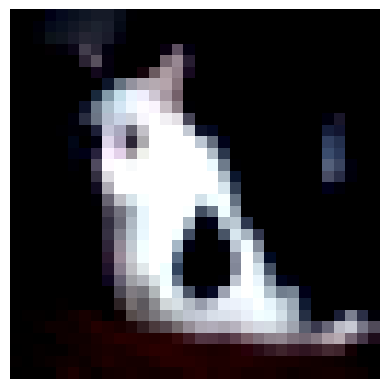

In [50]:
import matplotlib.pyplot as plt

# Step 1: Load CIFAR-10 dataset and extract an element
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(*stats)])
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True)



# Step 4: Pass the data through the model to get predictions
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images.to(device))
        s, predicted = torch.max(outputs, 1)
        break  # Stop after processing one example

# Step 5: Compare the correct label with the predicted label
predicted_class = predicted.item()
correct_class = labels.item()

# Step 6: Print the results
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print("Correct Label: ", class_names[correct_class])
print("Predicted Label: ", class_names[predicted_class])

# Step 7: Plot the image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Plot the test image
imshow(images[0])
